# Experiment: Time Series Prediction using RNN

### Objective
The objective of this experiment is to train and evaluate a Recurrent Neural Network (RNN) using the PyTorch library to predict the next value in a sample time series dataset. The focus is on understanding the architecture of RNNs and their application to sequential data.

### Description of the Model
The RNN model is designed for time series prediction with the following features:
- **Input Layer**: Takes sequential input data (time series values).
- **Recurrent Layer**: Consists of RNN cells to learn sequential dependencies in the data.
- **Linear Layer**: A fully connected layer maps the output of the RNN to a single prediction value.
- **Loss Function**: Mean Squared Error (MSE) to quantify the prediction error.
- **Optimizer**: Adam optimizer for efficient training.

Epoch 1/20, Loss: 0.0678
Epoch 2/20, Loss: 0.0039
Epoch 3/20, Loss: 0.0008
Epoch 4/20, Loss: 0.0004
Epoch 5/20, Loss: 0.0003
Epoch 6/20, Loss: 0.0002
Epoch 7/20, Loss: 0.0001
Epoch 8/20, Loss: 0.0001
Epoch 9/20, Loss: 0.0001
Epoch 10/20, Loss: 0.0001
Epoch 11/20, Loss: 0.0001
Epoch 12/20, Loss: 0.0001
Epoch 13/20, Loss: 0.0001
Epoch 14/20, Loss: 0.0001
Epoch 15/20, Loss: 0.0001
Epoch 16/20, Loss: 0.0000
Epoch 17/20, Loss: 0.0000
Epoch 18/20, Loss: 0.0000
Epoch 19/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000


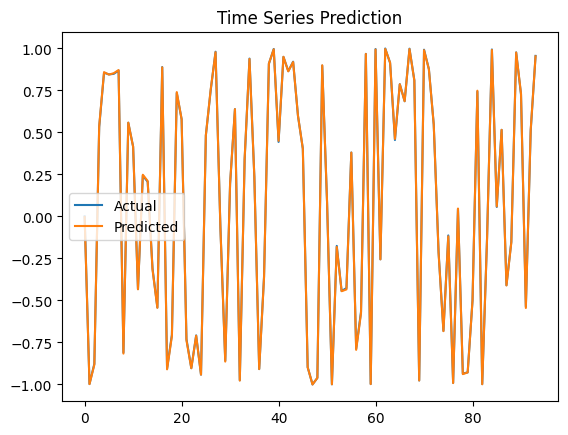

In [ ]:
# Python Implementation

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample time series dataset (sine wave)
def create_sine_wave_data(seq_length, num_samples):
    x = np.linspace(0, num_samples * np.pi, num_samples)
    y = np.sin(x)
    data = []
    for i in range(len(y) - seq_length):
        data.append((y[i:i + seq_length], y[i + seq_length]))
    return data

seq_length = 30
num_samples = 500
data = create_sine_wave_data(seq_length, num_samples)

# Prepare the dataset for PyTorch
class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x, y = self.data[index]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

dataset = TimeSeriesDataset(data)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x.unsqueeze(-1))  # Add feature dimension
        out = self.fc(out[:, -1, :])  # Use the last output
        return out

input_size = 1
hidden_size = 32
output_size = 1
model = RNNModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(x_batch)
        loss = criterion(predictions.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# Evaluate the model
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        preds = model(x_batch).squeeze()
        predictions.extend(preds.numpy())
        actuals.extend(y_batch.numpy())

# Plot results
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("Time Series Prediction")
plt.show()

### Performance Evaluation
- **Training Loss**: Training loss is printed for each epoch.
- **Prediction Plot**: A plot comparing actual and predicted values for the test set is displayed to evaluate the model's performance visually.

### My Comments
- **Limitations**: The model's performance is limited by its simplicity. RNNs often struggle with long-term dependencies in sequential data.
- **Scope of Improvement**:
  1. Use more advanced architectures like LSTM or GRU to capture long-term dependencies.
  2. Experiment with deeper networks or larger hidden sizes.
  3. Try different learning rates, optimizers, or regularization techniques to improve performance.
  4. Use real-world datasets for more practical applications.